In [28]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
oil = pd.read_csv('archives/oil.csv')
oil = oil[oil['Date'] <= '2020-02-27']

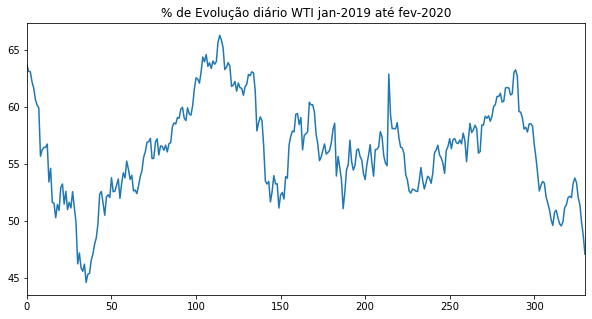

In [30]:
oil['Close'].plot(figsize = (10,5))
plt.title('% de Evolução diário WTI jan-2019 até fev-2020')
plt.show()

In [31]:
oil['MM 7 Dias'] = oil['Close'].rolling(7).mean()
oil['MM 21 Dias'] = oil['Close'].rolling(21).mean()
oil['% MM 7 Dias'] = oil['% Evol'].rolling(7).mean()
oil['% MM 21 Dias'] = oil['% Evol'].rolling(21).mean()
base = oil[oil['Date']>= '2019-01-02']


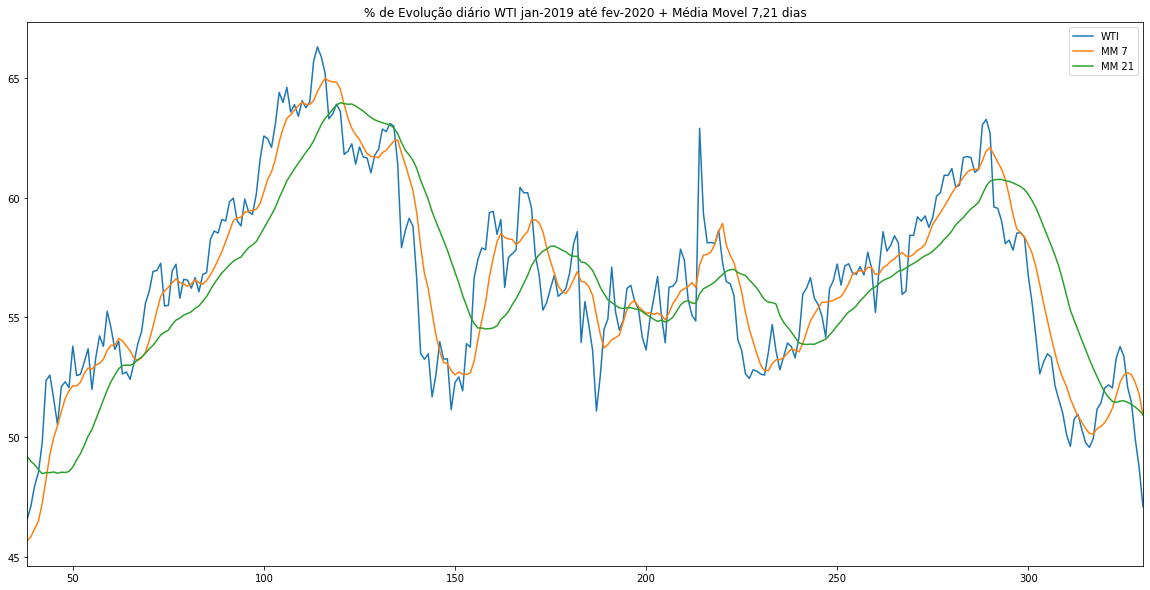

In [32]:
base['Close'].plot(figsize = (20,10), label = 'WTI')
base['MM 7 Dias'].plot(figsize = (20,10), label = 'MM 7')
base['MM 21 Dias'].plot(figsize = (20,10), label = 'MM 21')
plt.legend()
plt.title('% de Evolução diário WTI jan-2019 até fev-2020 + Média Movel 7,21 dias')
plt.show()

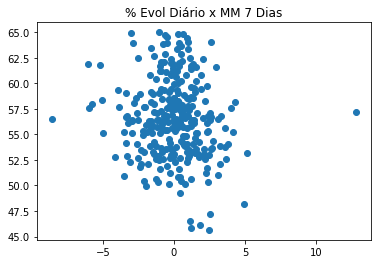

In [33]:
plt.scatter(base['% Evol'], base['MM 7 Dias'])
plt.title('% Evol Diário x MM 7 Dias')
plt.show()

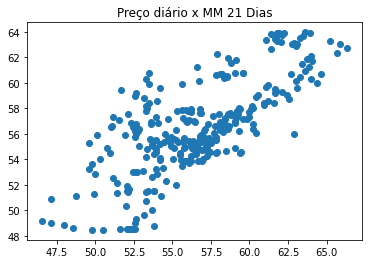

In [34]:
plt.scatter(base['Close'], base['MM 21 Dias'])
plt.title('Preço diário x MM 21 Dias')
plt.show()

In [35]:
x = np.array(base['Close']).reshape(293,1)
y = np.array(base['MM 21 Dias'].fillna(0)).reshape(293,1)

In [36]:
array = np.empty([293, 2], dtype=float)
for i in range(293):
    array[i] = (x[i],y[i])


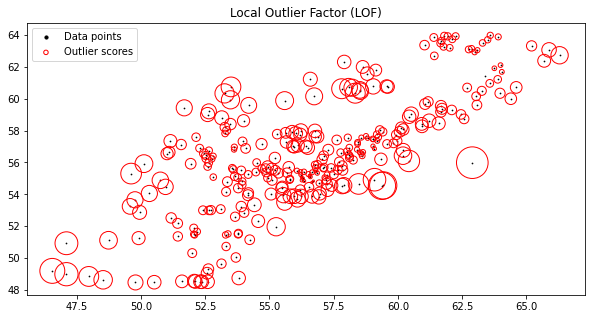

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

"""
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

"""


# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(array)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.figure(figsize = (10,5))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(array[:, 0], array[:, 1], color='k', s=0.5, label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(array[:, 0], array[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

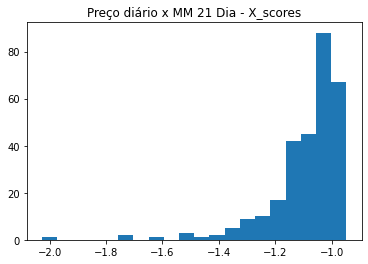

In [38]:
plt.hist(X_scores,bins=20)
plt.title('Preço diário x MM 21 Dia - X_scores')
plt.show()
